In [4]:
import suite2p
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import scipy.io
import pandas as pd
import re
import os
import glob
from natsort import natsorted
from multiprocessing import Pool
from joblib import Parallel, delayed
from pathlib import Path
import gc
gc.collect()
import importlib
import sys
from pathlib import Path
# Add the directory containing your script to the Python path
from suite2p import run_s2p

sys.path.append(r'C:\Users\zhangl33\Projects\Project-SLMonlineControl\CodeAndPackages\PYsubfun')

# Now you can import your script as a module
import FastBin_Suite2p as FBS
import CalBin2p as CB
import SLM_Offline as slmO

In [5]:
data= loadmat('D:\Project1-LocalProcessing\Step1\FOV.mat')
FOV=data['FOVUpdate']
FOVsave=data['suite2pFOVPathLocal']                    ##<<saved at local C:
FOVref=data['suite2pFOVPath']                         ##<<saved at server

In [9]:
opsTest=np.load(r'\\nimhlabstore1.nimh.nih.gov\UFNC\FNC3Z\Sutie2p-Processed\GCamP6S-CamKII\SL085503042025\sub1-2Spon\suite2p\plane0\ops.npy',allow_pickle=True).item()


In [6]:

ConfigFolder=r'C:\Users\zhangl33\Projects\Project-SLMonlineControl\config'
ops0, confSet=FBS.configLoad(ConfigFolder,'SLMsetting.yml','ops3PlanesG6.npy')
ops0['spatial_scale']=2
ops0['threshold_scaling']=0.8
ops0['denoise']=0
ops0['tau']=1.5
ops0['look_one_level_down']=False               ##This is important as the subfolders is defined in db
ops0['combined']=True

folder = r'D:\Project1-LocalProcessing\Step1'  # your path
all_csv = [f'FOV{i}.csv' for i in range(1,FOV.shape[1]+1)]
dfs = [pd.read_csv(os.path.join(folder, f)) for f in all_csv]

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Project1-LocalProcessing\\Step1\\FOV1.csv'

In [12]:
ops0['threshold_scaling']

0.8

In [34]:
#iscell.shape
#cellNum

#print(iscell)
iscellRaw=CaData['iscell']
print(iscellRaw)
SuccSLMTarget
indices = np.where(iscellRaw[:, 0] > 0)[0]
print(indices)
updateiscellTmp = np.union1d(indices, SuccSLMTarget)

slmO.update_iscell(FOVtempSave[0]+folder_name+'\suite2p',updateiscellTmp,3,AssignedSuite2bColor)

[[1.         0.56858409]
 [1.         0.96407817]
 [1.         0.96138113]
 [1.         0.60412569]
 [1.         0.99127115]
 [1.         0.66188019]
 [1.         0.97968896]
 [1.         0.99431338]
 [1.         0.95697493]
 [1.         0.57285727]
 [1.         0.99550821]
 [1.         0.99027803]
 [1.         0.9876992 ]
 [1.         0.98272005]
 [1.         0.73677569]
 [1.         0.5576819 ]
 [1.         0.98467958]
 [1.         0.98497779]
 [1.         0.88863343]
 [1.         0.9398509 ]
 [1.         0.92161381]
 [1.         0.97660874]
 [1.         0.98707537]
 [1.         0.94280486]
 [1.         0.93762097]
 [1.         0.81976546]
 [1.         0.91182837]
 [1.         0.98191171]
 [1.         0.85713501]
 [1.         0.97857768]
 [1.         0.95944758]
 [1.         0.92003376]
 [1.         0.98257463]
 [1.         0.73048356]
 [1.         0.97777261]
 [1.         0.95475922]
 [1.         0.98743398]
 [1.         0.97355476]
 [1.         0.97768847]
 [1.         0.99108236]


(array([[1.        , 0.56858409],
        [1.        , 0.96407817],
        [1.        , 0.96138113],
        [1.        , 0.60412569],
        [1.        , 0.99127115],
        [1.        , 0.66188019],
        [1.        , 0.97968896],
        [1.        , 0.99431338],
        [1.        , 0.95697493],
        [1.        , 0.57285727],
        [1.        , 0.99550821],
        [1.        , 0.99027803],
        [1.        , 0.9876992 ],
        [1.        , 0.98272005],
        [1.        , 0.73677569],
        [1.        , 0.5576819 ],
        [1.        , 0.98467958],
        [1.        , 0.98497779],
        [1.        , 0.88863343],
        [1.        , 0.9398509 ],
        [1.        , 0.92161381],
        [1.        , 0.97660874],
        [1.        , 0.98707537],
        [1.        , 0.94280486],
        [1.        , 0.93762097],
        [1.        , 0.81976546],
        [1.        , 0.91182837],
        [1.        , 0.98191171],
        [1.        , 0.85713501],
        [1.   

In [13]:
## all awake
RefKeyword = ['SLMall']
FunColorValue = [0.0,0.0,0.0]
sucTable = []
DistTh=10
for i in range(0,FOV.shape[1]):
    FOVtemp = FOV[0, i]
    FOVtempSave=FOVsave[0,i]
    FOVtempRef = FOVref[0,i]
    dfTemp=dfs[i]
    print(FOVtemp['DataFolder'])   # or whatever field you want
    ops0['data_path']=FOVtemp['DataFolder']
    #ops0['save_path0']=r'E:/LuSLMOnlineTest/SL0855-Emx1G6CII-AAV9CAMKII/03042025/SingleP/Top44SpeedStimEdgeExc/Data/'
    file_ids = dfTemp.loc[dfTemp['AwakeState'] < 2,'FileID']   
    TiffNum = dfTemp.loc[dfTemp['AwakeState'] < 2, 'Suite2pTiffNum']
    print(TiffNum.sum(),' tiff files')
    subFileRange = (file_ids.min(), file_ids.max())
    root     = Path(ops0['data_path'][0])
    folder_name = f"sub{subFileRange[0]}-{subFileRange[1]}awakeRef{RefKeyword[0]}"
    full_save_path = os.path.join(FOVtempSave[0], folder_name)
    suite2pdir= os.path.join(full_save_path, 'suite2p')

    confdir=root.parent.parent.parent
    FilteredPos3D, FilteredFunScore, FilteredTestPos3D, FilteredTestTBL = slmO.load_slm_data(root.parent)
    confSet=FBS.read_yaml(os.path.join(confdir,'CurrentSLMsetting.yml'))

    
    names, pairs = slmO.subfolders_and_pairs(FOVtempRef[0],RefKeyword)
    reffull_save_path = os.path.join(FOVtempRef[0], names[0])
    refsuite2pdir= os.path.join(reffull_save_path, 'suite2p')
    print(full_save_path)
    # Create the folder if it doesn't exist
    os.makedirs(full_save_path, exist_ok=True)
    ops0['save_path0']= full_save_path
    slmO.run_s2p_by_range(root, ops0, id_range=subFileRange, refImg_init = refsuite2pdir)


    CellPos3D, CellPos3DRaw, CaData, CaDataPlane, stat=slmO.extract_suite2p(suite2pdir, confSet)
    #iscell=CaData['iscell'][:,0]
    cellNum = CellPos3DRaw.shape[0]
    #stable_cells = slmO.ConsistentCell(matched_pairs)
    #AssignedSuite2bColor=slmO.ConsistentCellColor(stable_cells, cellNum)
    AssignedSuite2bColor = np.random.permutation(cellNum) / cellNum*0.6+0.2


    
    SLMTarget, SLMtargetCellDist=slmO.slm_target_match_cell(FilteredPos3D, CellPos3DRaw, DistTh)
    succRate=np.sum(SLMTarget>=0)/SLMTarget.shape[0]
    Ind = SLMTarget >=0 
    SuccSLMTarget = SLMTarget[Ind]

    iscellRaw=CaData['iscell']
    #print(iscellRaw)
    SuccSLMTarget
    indices = np.where(iscellRaw[:, 0] > 0)[0]
    #print(indices)
    updateiscellTmp = np.union1d(indices, SuccSLMTarget)
    SuccSLMTargetFunI=FilteredFunScore[Ind,0]
    for iColor in range(len(np.unique(SuccSLMTargetFunI))):
        AssignedSuite2bColor[SuccSLMTarget[SuccSLMTargetFunI==iColor]]=FunColorValue[iColor]
    slmO.update_iscell(FOVtempSave[0]+folder_name+'\suite2p',updateiscellTmp,3,AssignedSuite2bColor)
    sucTable.append({ 'full_save_path': full_save_path,'sucRate': succRate})

['E:\\LuSLMOnlineTest\\SL0855\\03042025\\SingleP\\Top44SpeedStimEdgeExc\\Data\\']
83550  tiff files
C:\GCamP6S-CamKII\\SL085503042025\sub1-60awakeRefSLMall
Load forced refImg
[run_s2p_by_range] Forced refImg list loaded for 3 planes: [(512, 512), (512, 512), (512, 512)]
{'data_path': ['E:\\LuSLMOnlineTest\\SL0855\\03042025\\SingleP\\Top44SpeedStimEdgeExc\\Data'], 'subfolders': ['TSeries-03042025-1059-001', 'TSeries-03042025-1059-002', 'TSeries-03042025-1059-007', 'TSeries-03042025-1059-008', 'TSeries-03042025-1059-009', 'TSeries-03042025-1059-010', 'TSeries-03042025-1059-011', 'TSeries-03042025-1059-012', 'TSeries-03042025-1059-013', 'TSeries-03042025-1059-014', 'TSeries-03042025-1059-015', 'TSeries-03042025-1059-016', 'TSeries-03042025-1059-017', 'TSeries-03042025-1059-018', 'TSeries-03042025-1059-020', 'TSeries-03042025-1059-021', 'TSeries-03042025-1059-022', 'TSeries-03042025-1059-023', 'TSeries-03042025-1059-024', 'TSeries-03042025-1059-025', 'TSeries-03042025-1059-026', 'TSeries-0

In [41]:
sucTable.append({ 'full_save_path': full_save_path,'sucRate': succRate})

In [57]:
## Power Test + group SLM
for i in range(FOV.shape[1]):
    FOVtemp = FOV[0, i]
    FOVtempSave=FOVsave[0,i]
    dfTemp=dfs[i]
    print(FOVtemp['DataFolder'])   # or whatever field you want
    ops0['data_path']=FOVtemp['DataFolder']
    #ops0['save_path0']=r'E:/LuSLMOnlineTest/SL0855-Emx1G6CII-AAV9CAMKII/03042025/SingleP/Top44SpeedStimEdgeExc/Data/'
    file_ids = dfTemp.loc[(dfTemp['AwakeState'] < 2) & (~pd.isna(dfTemp['markCycle'])),'FileID']   
    TiffNum = dfTemp.loc[(dfTemp['AwakeState'] < 2) & (~pd.isna(dfTemp['markCycle'])), 'Suite2pTiffNum']
    print(TiffNum.sum(),' tiff files')
    subFileRange = (file_ids.min(), file_ids.max())
    root     = ops0['data_path'][0]
    folder_name = f"sub{subFileRange[0]}-{subFileRange[1]}SLMall"
    full_save_path = os.path.join(FOVtempSave[0], folder_name)
    print(full_save_path)
    # Create the folder if it doesn't exist
    os.makedirs(full_save_path, exist_ok=True)
    ops0['save_path0']= full_save_path
    slmO.run_s2p_by_range(root, ops0, id_range=subFileRange)

['E:\\LuSLMOnlineTest\\SL0855\\03042025\\SingleP\\Top44SpeedStimEdgeExc\\Data\\']
58950  tiff files
\\nimhlabstore1.nimh.nih.gov\UFNC\FNC3Z\Sutie2p-Processed\GCamP6S-CamKII\\SL085503042025\sub7-60SLMall
{'data_path': ['E:\\LuSLMOnlineTest\\SL0855\\03042025\\SingleP\\Top44SpeedStimEdgeExc\\Data\\'], 'subfolders': ['TSeries-03042025-1059-007', 'TSeries-03042025-1059-008', 'TSeries-03042025-1059-009', 'TSeries-03042025-1059-010', 'TSeries-03042025-1059-011', 'TSeries-03042025-1059-012', 'TSeries-03042025-1059-013', 'TSeries-03042025-1059-014', 'TSeries-03042025-1059-015', 'TSeries-03042025-1059-016', 'TSeries-03042025-1059-017', 'TSeries-03042025-1059-018', 'TSeries-03042025-1059-020', 'TSeries-03042025-1059-021', 'TSeries-03042025-1059-022', 'TSeries-03042025-1059-023', 'TSeries-03042025-1059-024', 'TSeries-03042025-1059-025', 'TSeries-03042025-1059-026', 'TSeries-03042025-1059-027', 'TSeries-03042025-1059-028', 'TSeries-03042025-1059-029', 'TSeries-03042025-1059-030', 'TSeries-03042025-

In [58]:
## spontnous period
for i in range(FOV.shape[1]):
    FOVtemp = FOV[0, i]
    FOVtempSave=FOVsave[0,i]
    dfTemp=dfs[i]
    print(FOVtemp['DataFolder'])   # or whatever field you want
    ops0['data_path']=FOVtemp['DataFolder']
    #ops0['save_path0']=r'E:/LuSLMOnlineTest/SL0855-Emx1G6CII-AAV9CAMKII/03042025/SingleP/Top44SpeedStimEdgeExc/Data/'
    file_ids = dfTemp.loc[(dfTemp['AwakeState'] == 0) & (pd.isna(dfTemp['markCycle'])),'FileID']   
    TiffNum = dfTemp.loc[(dfTemp['AwakeState'] == 0) & (pd.isna(dfTemp['markCycle'])), 'Suite2pTiffNum']
    print(TiffNum.sum(),' tiff files')
    subFileRange = (file_ids.min(), file_ids.max())
    root     = ops0['data_path'][0]
    folder_name = f"sub{subFileRange[0]}-{subFileRange[1]}Spon"
    full_save_path = os.path.join(FOVtempSave[0], folder_name)
    print(full_save_path)
    # Create the folder if it doesn't exist
    os.makedirs(full_save_path, exist_ok=True)
    ops0['save_path0']= full_save_path
    slmO.run_s2p_by_range(root, ops0, id_range=subFileRange)

['E:\\LuSLMOnlineTest\\SL0855\\03042025\\SingleP\\Top44SpeedStimEdgeExc\\Data\\']
24600  tiff files
\\nimhlabstore1.nimh.nih.gov\UFNC\FNC3Z\Sutie2p-Processed\GCamP6S-CamKII\\SL085503042025\sub1-2Spon
{'data_path': ['E:\\LuSLMOnlineTest\\SL0855\\03042025\\SingleP\\Top44SpeedStimEdgeExc\\Data\\'], 'subfolders': ['TSeries-03042025-1059-001', 'TSeries-03042025-1059-002']}
FOUND BINARIES AND OPS IN ['\\\\nimhlabstore1.nimh.nih.gov\\UFNC\\FNC3Z\\Sutie2p-Processed\\GCamP6S-CamKII\\\\SL085503042025\\sub1-2Spon\\suite2p\\plane0\\ops.npy', '\\\\nimhlabstore1.nimh.nih.gov\\UFNC\\FNC3Z\\Sutie2p-Processed\\GCamP6S-CamKII\\\\SL085503042025\\sub1-2Spon\\suite2p\\plane1\\ops.npy', '\\\\nimhlabstore1.nimh.nih.gov\\UFNC\\FNC3Z\\Sutie2p-Processed\\GCamP6S-CamKII\\\\SL085503042025\\sub1-2Spon\\suite2p\\plane2\\ops.npy']
removing previous detection and extraction files, if present
>>>>>>>>>>>>>>>>>>>>> PLANE 0 <<<<<<<<<<<<<<<<<<<<<<
NOTE: not running registration, plane already registered
binary path: \\ni

c:\users\zhangl33\projects\suite2p\suite2p\detection\sparsedetect.py:286: UserWarning: Spatial scale estimation failed.  Setting spatial scale to 1 in order to continue.
  warn(


NOTE: FORCED spatial scale ~6 pixels, time epochs 1.00, threshold 9.00 
0 ROIs, score=89.61
Detected 319 ROIs, 7.03 sec
After removing overlaps, 307 ROIs remain
----------- Total 76.44 sec.
----------- EXTRACTION
Masks created, 0.19 sec.
Extracted fluorescence from 307 ROIs in 8200 frames, 5.85 sec.
----------- Total 7.47 sec.
----------- CLASSIFICATION
['skew', 'compact', 'npix_norm']
----------- SPIKE DECONVOLUTION
----------- Total 0.11 sec.
Plane 0 processed in 116.13 sec (can open in GUI).
>>>>>>>>>>>>>>>>>>>>> PLANE 1 <<<<<<<<<<<<<<<<<<<<<<
NOTE: not running registration, plane already registered
binary path: \\nimhlabstore1.nimh.nih.gov\UFNC\FNC3Z\Sutie2p-Processed\GCamP6S-CamKII\\SL088604152025\sub1-2Spon\suite2p\plane1\data.bin
NOTE: applying default C:\Users\zhangl33\.suite2p\classifiers\classifier_user.npy
----------- ROI DETECTION
Binning movie in chunks of length 10
Binned movie of size [820,508,508] created in 67.91 sec.
NOTE: estimated spatial scale ~6 pixels, time epoch

Only awake Period with SLM (Power test + group SLM)

In [59]:
## SLM Power Test
for i in range(FOV.shape[1]):
    FOVtemp = FOV[0, i]
    FOVtempSave=FOVsave[0,i]
    dfTemp=dfs[i]
    print(FOVtemp['DataFolder'])   # or whatever field you want
    ops0['data_path']=FOVtemp['DataFolder']
    #ops0['save_path0']=r'E:/LuSLMOnlineTest/SL0855-Emx1G6CII-AAV9CAMKII/03042025/SingleP/Top44SpeedStimEdgeExc/Data/'
    file_ids = dfTemp.loc[(dfTemp['AwakeState'] == 0) & (~pd.isna(dfTemp['markCycle'])),'FileID']   
    TiffNum = dfTemp.loc[(dfTemp['AwakeState'] == 0) & (~pd.isna(dfTemp['markCycle'])), 'Suite2pTiffNum']
    print(TiffNum.sum(),' tiff files')
    subFileRange = (file_ids.min(), file_ids.max())
    root     = ops0['data_path'][0]
    folder_name = f"sub{subFileRange[0]}-{subFileRange[1]}SLMpower"
    full_save_path = os.path.join(FOVtempSave[0], folder_name)
    print(full_save_path)
    # Create the folder if it doesn't exist
    os.makedirs(full_save_path, exist_ok=True)
    ops0['save_path0']= full_save_path
    slmO.run_s2p_by_range(root, ops0, id_range=subFileRange)

['E:\\LuSLMOnlineTest\\SL0855\\03042025\\SingleP\\Top44SpeedStimEdgeExc\\Data\\']
26550  tiff files
\\nimhlabstore1.nimh.nih.gov\UFNC\FNC3Z\Sutie2p-Processed\GCamP6S-CamKII\\SL085503042025\sub7-33SLMpower
{'data_path': ['E:\\LuSLMOnlineTest\\SL0855\\03042025\\SingleP\\Top44SpeedStimEdgeExc\\Data\\'], 'subfolders': ['TSeries-03042025-1059-007', 'TSeries-03042025-1059-008', 'TSeries-03042025-1059-009', 'TSeries-03042025-1059-010', 'TSeries-03042025-1059-011', 'TSeries-03042025-1059-012', 'TSeries-03042025-1059-013', 'TSeries-03042025-1059-014', 'TSeries-03042025-1059-015', 'TSeries-03042025-1059-016', 'TSeries-03042025-1059-017', 'TSeries-03042025-1059-018', 'TSeries-03042025-1059-020', 'TSeries-03042025-1059-021', 'TSeries-03042025-1059-022', 'TSeries-03042025-1059-023', 'TSeries-03042025-1059-024', 'TSeries-03042025-1059-025', 'TSeries-03042025-1059-026', 'TSeries-03042025-1059-027', 'TSeries-03042025-1059-028', 'TSeries-03042025-1059-029', 'TSeries-03042025-1059-030', 'TSeries-0304202

In [60]:
## group SLM
for i in range(FOV.shape[1]):
    FOVtemp = FOV[0, i]
    FOVtempSave=FOVsave[0,i]
    dfTemp=dfs[i]
    print(FOVtemp['DataFolder'])   # or whatever field you want
    ops0['data_path']=FOVtemp['DataFolder']
    #ops0['save_path0']=r'E:/LuSLMOnlineTest/SL0855-Emx1G6CII-AAV9CAMKII/03042025/SingleP/Top44SpeedStimEdgeExc/Data/'
    file_ids = dfTemp.loc[(dfTemp['AwakeState'] == 1) & (~pd.isna(dfTemp['markCycle'])),'FileID']   
    TiffNum = dfTemp.loc[(dfTemp['AwakeState'] == 1) & (~pd.isna(dfTemp['markCycle'])), 'Suite2pTiffNum']
    print(TiffNum.sum(),' tiff files')
    subFileRange = (file_ids.min(), file_ids.max())
    root     = ops0['data_path'][0]
    folder_name = f"sub{subFileRange[0]}-{subFileRange[1]}SLMgroup"
    full_save_path = os.path.join(FOVtempSave[0], folder_name)
    print(full_save_path)
    # Create the folder if it doesn't exist
    os.makedirs(full_save_path, exist_ok=True)
    ops0['save_path0']= full_save_path
    slmO.run_s2p_by_range(root, ops0, id_range=subFileRange)

['E:\\LuSLMOnlineTest\\SL0855\\03042025\\SingleP\\Top44SpeedStimEdgeExc\\Data\\']
32400  tiff files
\\nimhlabstore1.nimh.nih.gov\UFNC\FNC3Z\Sutie2p-Processed\GCamP6S-CamKII\\SL085503042025\sub39-60SLMgroup
{'data_path': ['E:\\LuSLMOnlineTest\\SL0855\\03042025\\SingleP\\Top44SpeedStimEdgeExc\\Data\\'], 'subfolders': ['TSeries-03042025-1059-039', 'TSeries-03042025-1059-040', 'TSeries-03042025-1059-041', 'TSeries-03042025-1059-042', 'TSeries-03042025-1059-043', 'TSeries-03042025-1059-044', 'TSeries-03042025-1059-045', 'TSeries-03042025-1059-046', 'TSeries-03042025-1059-047', 'TSeries-03042025-1059-050', 'TSeries-03042025-1059-051', 'TSeries-03042025-1059-052', 'TSeries-03042025-1059-053', 'TSeries-03042025-1059-054', 'TSeries-03042025-1059-055', 'TSeries-03042025-1059-056', 'TSeries-03042025-1059-057', 'TSeries-03042025-1059-058', 'TSeries-03042025-1059-059', 'TSeries-03042025-1059-060']}
FOUND BINARIES AND OPS IN ['\\\\nimhlabstore1.nimh.nih.gov\\UFNC\\FNC3Z\\Sutie2p-Processed\\GCamP6S-C

In [5]:
## spontnous period  +SLMpower
#FOVsave=data['suite2pFOVPath']
for i in range(FOV.shape[1]-7):
    FOVtemp = FOV[0, i]
    FOVtempSave=FOVsave[0,i]
    dfTemp=dfs[i]
    #print(FOVtemp['DataFolder'])   # or whatever field you want
    ops0['data_path']=FOVtemp['DataFolder']
    #ops0['save_path0']=r'E:/LuSLMOnlineTest/SL0855-Emx1G6CII-AAV9CAMKII/03042025/SingleP/Top44SpeedStimEdgeExc/Data/'
    file_ids = dfTemp.loc[(dfTemp['AwakeState'] == 0),'FileID']   
    TiffNum = dfTemp.loc[(dfTemp['AwakeState'] == 0), 'Suite2pTiffNum']
    #print(TiffNum.sum(),' tiff files')
    subFileRange = (file_ids.min(), file_ids.max())
    root     = ops0['data_path'][0]
    folder_name = f"sub{subFileRange[0]}-{subFileRange[1]}SponSLMpower"
    full_save_path = os.path.join(FOVtempSave[0], folder_name)
    print(full_save_path)
    # Create the folder if it doesn't exist
    os.makedirs(full_save_path, exist_ok=True)
    ops0['save_path0']= full_save_path
    slmO.run_s2p_by_range(root, ops0, id_range=subFileRange)

\\nimhlabstore1.nimh.nih.gov\UFNC\FNC3Z\Sutie2p-Processed\GCamP6S-CamKII\\SL085503042025\sub1-33SponSLMpower
{'data_path': ['E:\\LuSLMOnlineTest\\SL0855\\03042025\\SingleP\\Top44SpeedStimEdgeExc\\Data\\'], 'subfolders': ['TSeries-03042025-1059-001', 'TSeries-03042025-1059-002', 'TSeries-03042025-1059-007', 'TSeries-03042025-1059-008', 'TSeries-03042025-1059-009', 'TSeries-03042025-1059-010', 'TSeries-03042025-1059-011', 'TSeries-03042025-1059-012', 'TSeries-03042025-1059-013', 'TSeries-03042025-1059-014', 'TSeries-03042025-1059-015', 'TSeries-03042025-1059-016', 'TSeries-03042025-1059-017', 'TSeries-03042025-1059-018', 'TSeries-03042025-1059-020', 'TSeries-03042025-1059-021', 'TSeries-03042025-1059-022', 'TSeries-03042025-1059-023', 'TSeries-03042025-1059-024', 'TSeries-03042025-1059-025', 'TSeries-03042025-1059-026', 'TSeries-03042025-1059-027', 'TSeries-03042025-1059-028', 'TSeries-03042025-1059-029', 'TSeries-03042025-1059-030', 'TSeries-03042025-1059-032', 'TSeries-03042025-1059-03

KeyboardInterrupt: 

In [20]:
range(FOV.shape[1])
range(2,FOV.shape[1])

range(2, 8)

In [23]:

ops0['threshold_scaling']=1.6
for i in range(2,FOV.shape[1]):
    FOVtemp = FOV[0, i]
    dfTemp=dfs[i]
    print(FOVtemp['DataFolder'])   # or whatever field you want
    ops0['data_path']=FOVtemp['DataFolder']
    #ops0['save_path0']=r'E:/LuSLMOnlineTest/SL0855-Emx1G6CII-AAV9CAMKII/03042025/SingleP/Top44SpeedStimEdgeExc/Data/'
    
    file_ids = dfTemp.loc[dfTemp['AwakeState'] == 1, 'FileID']
    TiffNum = dfTemp.loc[dfTemp['AwakeState'] == 1, 'Suite2pTiffNum']
    print(TiffNum.sum(),' tiff files')
    subFileRange = (file_ids.min(), file_ids.max())
    root     = ops0['data_path'][0]
    folder_name = f"sub{subFileRange[0]}-{subFileRange[1]}SLM"
    full_save_path = os.path.join(ops0['data_path'][0], folder_name)
    print(full_save_path)
    # Create the folder if it doesn't exist
    os.makedirs(full_save_path, exist_ok=True)
    ops0['save_path0']= full_save_path
    run_s2p_by_range(root, ops0, id_range=subFileRange)

['E:\\LuSLMOnlineTest\\SL0864\\04162025\\SingleP\\Top35SpeedStimEdgeExc\\Data\\']
34020  tiff files
E:\LuSLMOnlineTest\SL0864\04162025\SingleP\Top35SpeedStimEdgeExc\Data\sub35-59SLM
{'data_path': ['E:\\LuSLMOnlineTest\\SL0864\\04162025\\SingleP\\Top35SpeedStimEdgeExc\\Data\\'], 'subfolders': ['TSeries-04162025-1028-035', 'TSeries-04162025-1028-038', 'TSeries-04162025-1028-039', 'TSeries-04162025-1028-040', 'TSeries-04162025-1028-041', 'TSeries-04162025-1028-042', 'TSeries-04162025-1028-043', 'TSeries-04162025-1028-044', 'TSeries-04162025-1028-045', 'TSeries-04162025-1028-046', 'TSeries-04162025-1028-049', 'TSeries-04162025-1028-050', 'TSeries-04162025-1028-051', 'TSeries-04162025-1028-052', 'TSeries-04162025-1028-053', 'TSeries-04162025-1028-054', 'TSeries-04162025-1028-055', 'TSeries-04162025-1028-056', 'TSeries-04162025-1028-057', 'TSeries-04162025-1028-058', 'TSeries-04162025-1028-059']}
tif
** Found 34020 tifs - converting to binary **
2004 frames of binary, time 244.00 sec.
4008 f

Only initial spontanous period

In [18]:
i

2

In [ ]:

ops0['threshold_scaling']=1.6
for i in range(FOV.shape[1]):
    FOVtemp = FOV[0, i]
    dfTemp=dfs[i]
    print(FOVtemp['DataFolder'])   # or whatever field you want
    ops0['data_path']=FOVtemp['DataFolder']
    #ops0['save_path0']=r'E:/LuSLMOnlineTest/SL0855-Emx1G6CII-AAV9CAMKII/03042025/SingleP/Top44SpeedStimEdgeExc/Data/'
    
    file_ids = dfTemp.loc[dfTemp['AwakeState'] == 0, 'FileID']
    TiffNum = dfTemp.loc[dfTemp['AwakeState'] == 0, 'Suite2pTiffNum']
    print(TiffNum.sum(),' tiff files')
    subFileRange = (file_ids.min(), file_ids.max())
    root     = ops0['data_path'][0]
    folder_name = f"sub{subFileRange[0]}-{subFileRange[1]}Multi"
    full_save_path = os.path.join(ops0['data_path'][0], folder_name)
    #print(full_save_path)
    # Create the folder if it doesn't exist
    os.makedirs(full_save_path, exist_ok=True)
    ops0['save_path0']= full_save_path
    run_s2p_by_range(root, ops0, id_range=subFileRange)

['E:\\LuSLMOnlineTest\\SL0855\\03042025\\SingleP\\Top44SpeedStimEdgeExc\\Data\\']
51150  tiff files
{'data_path': ['E:\\LuSLMOnlineTest\\SL0855\\03042025\\SingleP\\Top44SpeedStimEdgeExc\\Data\\'], 'subfolders': ['TSeries-03042025-1059-001', 'TSeries-03042025-1059-002', 'TSeries-03042025-1059-007', 'TSeries-03042025-1059-008', 'TSeries-03042025-1059-009', 'TSeries-03042025-1059-010', 'TSeries-03042025-1059-011', 'TSeries-03042025-1059-012', 'TSeries-03042025-1059-013', 'TSeries-03042025-1059-014', 'TSeries-03042025-1059-015', 'TSeries-03042025-1059-016', 'TSeries-03042025-1059-017', 'TSeries-03042025-1059-018', 'TSeries-03042025-1059-020', 'TSeries-03042025-1059-021', 'TSeries-03042025-1059-022', 'TSeries-03042025-1059-023', 'TSeries-03042025-1059-024', 'TSeries-03042025-1059-025', 'TSeries-03042025-1059-026', 'TSeries-03042025-1059-027', 'TSeries-03042025-1059-028', 'TSeries-03042025-1059-029', 'TSeries-03042025-1059-030', 'TSeries-03042025-1059-032', 'TSeries-03042025-1059-033']}
tif


In [40]:
range(1,FOV.shape[1]+1)

range(1, 9)

In [33]:
folder = r'D:\Project1-LocalProcessing\Step1'  # your path
all_csv = [f'FOV{i}.csv' for i in range(1, 9)]  # FOV1.csv to FOV8.csv

# Load all tables into a list of DataFrames
dfs = [pd.read_csv(os.path.join(folder, f)) for f in all_csv]

In [48]:
dfTemp=dfs[0]
file_ids = dfTemp.loc[dfTemp['AwakeState'] != 2, 'FileID']
interval = (file_ids.min(), file_ids.max())
print(interval)

(1, 60)


Adjust suite2p parameters before processing

In [18]:
ConfigFolder=r'C:\Users\zhangl33\Projects\Project-SLMonlineControl\config'
ops0, confSet=FBS.configLoad(ConfigFolder,'SLMsetting.yml','ops3PlanesG6.npy')
ops0['spatial_scale']=2
ops0['threshold_scaling']=1.6
ops0['denoise']=1
ops0['tau']=1.5
#ops0['data_path']=r'E:\LuSLMOnlineTest\SL0855-Emx1G6CII-AAV9CAMKII\03062025\SingleP\Top49SpeedStimEdgeExc\Data'
ops0['data_path']=[r'E:/LuSLMOnlineTest/SL0855-Emx1G6CII-AAV9CAMKII/03042025/SingleP/Top44SpeedStimEdgeExc/Data/']
#ops0['save_path0']=r'E:/LuSLMOnlineTest/SL0855-Emx1G6CII-AAV9CAMKII/03042025/SingleP/Top44SpeedStimEdgeExc/Data/'
ops0['save_path0']= r'E:\LuSLMOnlineTest\SL0855-Emx1G6CII-AAV9CAMKII\03042025\SingleP\Top44SpeedStimEdgeExc\Data\sub8-10Multi'
#ops0['save_folder']=r'E:\LuSLMOnlineTest\SL0855-Emx1G6CII-AAV9CAMKII\03062025\SingleP\Top49SpeedStimEdgeExc\Data'
ops0['look_one_level_down']=False               ##This is important as the subfolders is defined in db
ops0['combined']=True

In [6]:
# run_s2p_by_range.py

def run_s2p_by_range(root, ops_in, id_range):
    """
    root      : full path to the parent 'Data' folder
    ops_in    : dict with Suite2p parameters you care about (e.g. {'tau': 1.5})
    id_range  : (low, high) tuple of integers; keeps folders whose final
                3-digit suffix is between low and high inclusive.
    """
    low, high = id_range

    # -------- pick sub-folders --------
    pattern   = re.compile(r'^TSeries-.*-(\d{3})$')
    subfolders = []
    for p in Path(root).iterdir():
        if not p.is_dir():                 # skip files
            continue
        m = pattern.match(p.name)
        if m and low <= int(m.group(1)) <= high:
            subfolders.append(p.name)

    if not subfolders:
        raise ValueError(f'No TSeries folders with suffix in [{low}, {high}] found')

    # -------- build ops + db --------
    ops = dict(look_one_level_down=True)   # <- needed when you give subfolders
    ops.update(ops_in)                     # user-specified overrides

    db  = dict(data_path=[str(root)],
               subfolders=subfolders)

    # -------- run Suite2p --------
    run_s2p(ops=ops, db=db, server=False)


In [26]:
import getpass, os, pathlib, socket

root_drive = pathlib.Path(root).drive or '/'   # e.g. 'E:\\'  or  '/'
server = dict(
    host        = 'localhost',
    username    = getpass.getuser(),
    password    = '',              # use ssh‑key auth instead of a password
    server_root = root_drive,      # remote prefix
    local_root  = root_drive,      # local prefix (must match for path swap)
    n_cores     = 3   # how many cores each plane can use
)

suite2p processing

In [3]:
SaveFolder=os.path.join(ops0['save_path0'], 'suite2p')
FBS.PostMannual(SaveFolder,ops0)

720 of units including 380 identified cells in combined planes


In [184]:
WorkFolder=ops0['save_path0']
ProcessFolder = CB.get_exp_data_folder(WorkFolder, 'SpeedStimEdgeExc', {'Data','AllIncluded','DataSum','.gpl','.xml'})

SLMFunInfo = scipy.io.loadmat(os.path.join(ProcessFolder, "SLMFunGroup.mat"))
Pos3DFunGroup = SLMFunInfo.get('FinalPos3D') 
FunScore = SLMFunInfo.get('FinalFunScore')

valid_rows = ~np.isnan(Pos3DFunScore [:, 1]) & ~np.isnan(Pos3DFunScore [:, 2])
FilteredPos3D = Pos3DFunGroup[valid_rows]
FilteredFunScore = FunScore[valid_rows]

SLMTestInfo = scipy.io.loadmat(os.path.join(ProcessFolder, "SLMIncludedIndFromIscell.mat"))
SLMTestPos3D = SLMTestInfo.get('Pos3Dneed') 
SLMTestTBL = SLMFunInfo.get('SLMTable')
valid_rows = ~np.isnan(SLMTestTBL [:, 1])
FilteredTestPos3D = SLMTestPos3D[valid_rows]
FilteredTestTBL = SLMTestTBL[valid_rows]



# Assuming FilteredPos3D and FilteredTestPos3D are defined
I = np.array([np.where((FilteredTestPos3D == row).all(axis=1))[0][0] for row in FilteredPos3D])

diff = FilteredTestPos3D[I] - FilteredPos3D
etl_values = list(map(float, confSet["ETL"].split()))
zdepth = [z + confSet["scan_Z"] for z in etl_values]
colorTarget = np.ones((FilteredTestPos3D.shape[0], 3)) * [1, 1, 0]  
color_map = {
    1: [1, 0, 0],  # Red
    2: [0, 1, 0],  # Green
    3: [0, 0, 1]   # Blue
}

# Loop through each functional group ID and assign colors
for group_id, color in color_map.items():
    colorTarget[I[FilteredFunScore[:, 0] == group_id]] = color

SaveFolder=os.path.join(ops0['save_path0'],'suite2p')
nplanes=ops0['nplanes'];
refImg1 = np.zeros(( ops0['Ly'], ops0['Lx'], nplanes))
refImg1E=refImg1.copy()
for plane_idx in range(nplanes):
    #print(plane_idx)
    fpath=os.path.join(SaveFolder, f'plane{plane_idx}/');
    #np.save(os.path.join(fpath, "iscell.npy"), iscell) ##update the iscell for each plane from the combined data
    #opsPlane[plane_idx]= np.load(os.path.join(fpath, "ops.npy"),allow_pickle=True)
    print(fpath)
    opsTemp=np.load(os.path.join(fpath, "ops.npy"),allow_pickle=True)
    #opsTemp=np.load(os.path.join(fpath, "ops.npy"))
    refImg1[:,:,plane_idx]=opsTemp.item()['meanImg']
    refImg1E[:,:,plane_idx]=opsTemp.item()['meanImgE']
    #opsTemp['meanImg']

E:\LuSLMOnlineTest\SL0855-Emx1G6CII-AAV9CAMKII\03062025\suite2p\plane0/
E:\LuSLMOnlineTest\SL0855-Emx1G6CII-AAV9CAMKII\03062025\suite2p\plane1/
E:\LuSLMOnlineTest\SL0855-Emx1G6CII-AAV9CAMKII\03062025\suite2p\plane2/


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


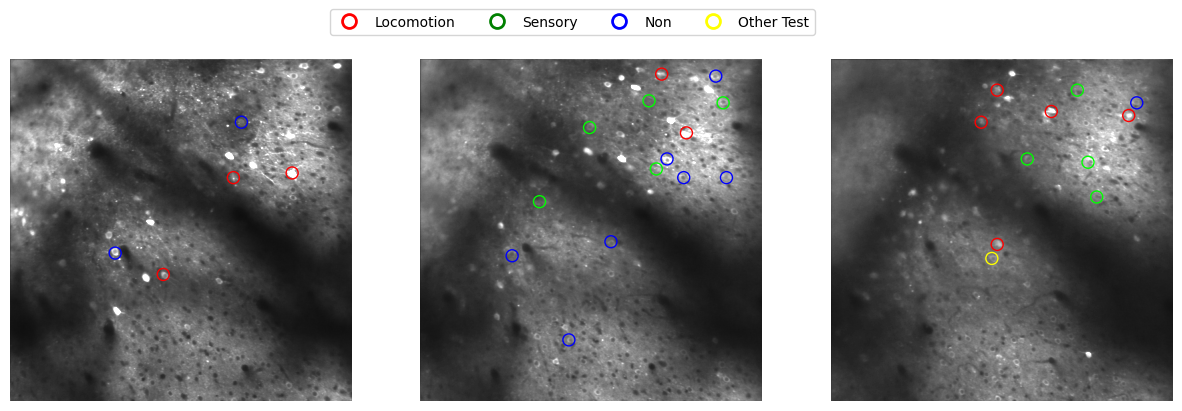

In [220]:
# Convert ETL string to a list of floats
importlib.reload(CB)
fig, axes = CB.multi_planes_2d_show(refImg1, None, FilteredTestPos3D, None, zdepth, colorTarget, img_clim=[0,1000], plot_param=None)

legend_labels = ['Locomotion', 'Sensory', 'Non', 'Other Test']
legend_colors = ['red', 'green', 'blue', 'yellow']

# Create Legend patches using Line2D for circles
legend_patches = [mlines.Line2D([0], [0], color=color, marker='o', linestyle='None', 
                                markersize=10, markeredgewidth=2, fillstyle='none') 
                  for color in legend_colors]
# Add the Legend to the figure
fig.legend(handles=legend_patches, labels=legend_labels, loc='upper center', 
           ncol=len(legend_labels), fontsize=10, bbox_to_anchor=(0.5, 0.95))


save_path = os.path.join(ProcessFolder, "FinalTargets_Suite2p.png")
fig.savefig(save_path, dpi=300, bbox_inches='tight')
save_path = os.path.join(ProcessFolder, "FinalTargets_Suite2p.tif")
fig.savefig(save_path, dpi=300, bbox_inches='tight')
save_path = os.path.join(ProcessFolder, "FinalTargets_Suite2p.svg")
fig.savefig(save_path, dpi=300, bbox_inches='tight')
save_path = os.path.join(ProcessFolder, "FinalTargets_Suite2p.eps")
fig.savefig(save_path, dpi=300, bbox_inches='tight')
# Save the figure before showing
 
plt.show()